# Feature Selection

In [1]:
!pip install imblearn

     |████████████████████████████████| 167 kB 10.8 MB/s eta 0:00:01
     |████████████████████████████████| 22.2 MB 9.9 MB/s eta 0:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.1
    Uninstalling scikit-learn-0.22.1:
      Successfully uninstalled scikit-learn-0.22.1
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2, SelectKBest, mutual_info_classif, SelectPercentile

from imblearn.over_sampling import RandomOverSampler, SMOTE

## Import Dataset

In [3]:
accidents = pd.read_csv('data/accidents.csv', index_col=0)
accidents.head(2)

,RD_NO,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,LANE_CNT,...,was_dark_no_lighting,is_day,is_evening,is_morning,is_night,season,is_fall,is_spring,is_summer,is_winter
0,JC343143,07/10/2019 05:56:00 PM,35,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,ONE-WAY,NaN,...,0,1,0,0,0,summer,0,0,1,0
1,JC194776,03/21/2019 10:50:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,NOT DIVIDED,4.0,...,0,0,0,0,1,spring,0,1,0,0


In [4]:
for feature in sorted(accidents.columns):
    print(feature)

ALIGNMENT
BEAT_OF_OCCURRENCE
CRASH_DATE
CRASH_DAY_OF_WEEK
CRASH_HOUR
CRASH_TYPE
DEVICE_CONDITION
FIRST_CRASH_TYPE
HIT_AND_RUN_I
INJURIES_UNKNOWN
INTERSECTION_RELATED_I
LANE_CNT
LATITUDE
LIGHTING_CONDITION
LOCATION
LONGITUDE
NOT_RIGHT_OF_WAY_I
POSTED_SPEED_LIMIT
PRIM_CONTRIBUTORY_CAUSE
RD_NO
ROADWAY_SURFACE_COND
ROAD_DEFECT
SEC_CONTRIBUTORY_CAUSE
STREET_DIRECTION
STREET_NAME
STREET_NO
TRAFFICWAY_TYPE
TRAFFIC_CONTROL_DEVICE
WEATHER_CONDITION
WORKERS_PRESENT_I
WORK_ZONE_I
WORK_ZONE_TYPE
at_intersection
at_stop_sign_or_traffic_light
crash_date
crash_month
crash_year
has_snow_ice
involved_pedest_cycle
is_clear_weather
is_day
is_evening
is_fall
is_fatal_or_incap
is_morning
is_night
is_rain
is_sleet_snow
is_spring
is_summer
is_weekend
is_winter
season
time_of_day
was_dark_no_lighting


## Split Data and Determine Features to Assess
Selecting features solely based on training data.

In [5]:
X = accidents[['crash_month',
              'CRASH_HOUR',
              'is_weekend',
              'has_snow_ice',
              'involved_pedest_cycle',
              'at_intersection',
              'at_stop_sign_or_traffic_light',
              'is_day',
              'is_evening',
              'is_morning',
              'is_night',
               'is_rain',
               'is_sleet_snow',
               'is_spring',
               'is_summer',
               'is_weekend',
               'is_winter']]

y = accidents['is_fatal_or_incap']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [7]:
X_train

,crash_month,CRASH_HOUR,is_weekend,has_snow_ice,involved_pedest_cycle,at_intersection,at_stop_sign_or_traffic_light,is_day,is_evening,is_morning,is_night,is_rain,is_sleet_snow,is_spring,is_summer,is_weekend,is_winter
23106,7,16,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0
74711,12,12,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
56033,5,21,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
232719,9,13,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
86242,12,17,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11261,1,16,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1
48056,1,14,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1
77049,12,15,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
198296,12,20,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [17]:
# OVERSAMPLING

oversampler = RandomOverSampler(sampling_strategy=0.5, random_state=3)
#oversampler = SMOTE(sampling_strategy=0.5, random_state=3)
X_over, y_over = oversampler.fit_resample(X_train.to_numpy(), y_train.to_numpy())

## Mutual Information

In [18]:
mutual_info_scores = mutual_info_classif(X_over, y_over)
mutual_info_scores

array([3.65193228e-03, 1.83835176e-03, 8.23345376e-02, 3.72926824e-03,
       1.36587259e-02, 1.30175498e-02, 1.69982613e-03, 5.06285678e-04,
       2.90360595e-03, 2.05132713e-03, 8.17733549e-05, 9.47022412e-04,
       3.38096778e-03, 2.57401508e-03, 3.40931572e-03])

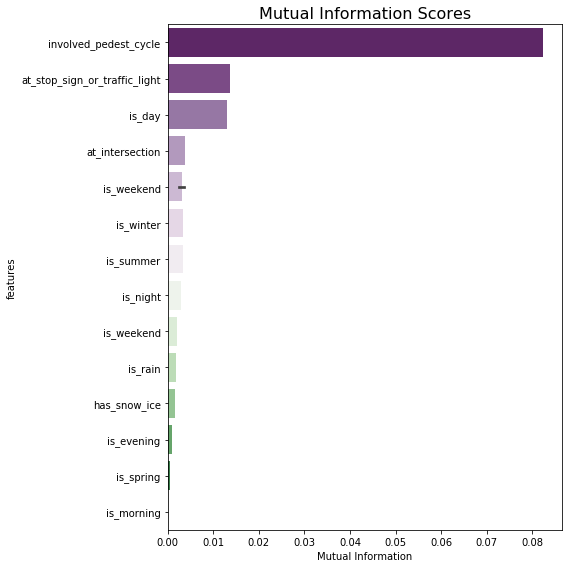

In [19]:
mi_df = pd.DataFrame()
mi_df['features'] = X.columns
mi_df['mutual_info_score'] = mutual_info_scores
mi_df.sort_values('mutual_info_score', ascending=False, axis=0, inplace=True)


fig, ax = plt.subplots(figsize=(8,8))
sns.barplot(data=mi_df,x='mutual_info_score', y='features', palette='PRGn', ax=ax)
ax.set_title('Mutual Information Scores', fontsize=16)
ax.set_xlabel('Mutual Information')
ax.set_yticklabels(mi_df['features'])
fig.tight_layout();

## Chi-Squared

Can only use categorical features.

In [21]:
X = accidents[['is_weekend',
              'has_snow_ice',
              'involved_pedest_cycle',
              'at_intersection',
              'at_stop_sign_or_traffic_light',
              'is_day',
              'is_evening',
              'is_morning',
              'is_night',
               'is_rain',
               'is_sleet_snow',
               'is_spring',
               'is_summer',
               'is_weekend',
               'is_winter']]

y = accidents['is_fatal_or_incap']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [22]:
# OVERSAMPLING
oversampler = RandomOverSampler(sampling_strategy=0.5, random_state=3)
#oversampler = SMOTE(sampling_strategy=0.5, random_state=3)

X_over, y_over = oversampler.fit_resample(X_train.to_numpy(), y_train.to_numpy())

In [23]:
# First array is comprised of the F-scores.
# Second array is comprised of the p-values.
f_score = chi2(X_over, y_over)
f_score

(array([1.21330784e+02, 5.85270521e+02, 5.00555771e+04, 1.94515760e+03,
        2.74283184e+03, 8.63112354e+02, 7.81876347e+01, 3.36736611e+00,
        1.75682546e+03, 6.55721295e+02, 1.74159138e+02, 1.66316335e+01,
        6.78687191e+01, 1.21330784e+02, 9.69226328e+01]),
 array([3.23445507e-028, 2.67697315e-129, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 1.02550662e-189, 9.37032523e-019, 6.64999926e-002,
        0.00000000e+000, 1.27306497e-144, 9.13759159e-040, 4.53876728e-005,
        1.74751648e-016, 3.23445507e-028, 7.20898979e-023]))

In [34]:
chi2_p_values = pd.DataFrame()
chi2_p_values['features'] = X_train.columns
chi2_p_values['p_value'] = f_score[1]
chi2_p_values['p_value'] = chi2_p_values['p_value'].apply(lambda x: np.round(x, decimals=4))
chi2_p_values.sort_values('p_value', ascending=True, axis=0, inplace=True)


chi2_p_values

,features,p_value
0,is_weekend,0.0000
1,has_snow_ice,0.0000
2,involved_pedest_cycle,0.0000
3,at_intersection,0.0000
4,at_stop_sign_or_traffic_light,0.0000
5,is_day,0.0000
6,is_evening,0.0000
8,is_night,0.0000
9,is_rain,0.0000
10,is_sleet_snow,0.0000
